<a href="https://colab.research.google.com/github/Lily1619/Fire-Rescue-Robot/blob/main/Workng_real_copy_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/100_1.npy")

array([-0.03720375, -0.04355592, -0.03254148, ...,  0.00841994,
        0.00907958, -0.00280602])

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
import wfdb

In [ ]:
direct = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/100"
record = wfdb.rdrecord(direct)

In [ ]:
direct_2 = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/04043"
record_2 = wfdb.rdrecord(direct_2)

In [ ]:
direct_3 = "/content/drive/MyDrive/datasets/dsp_datasets/supra/800"
record_3 = wfdb.rdrecord(direct_3)

In [ ]:
sampling = record_3.fs
sampling

128

In [ ]:
signal = record.p_signal
signal = signal[:,0]

In [ ]:
sampling = record.fs
sampling

360

In [ ]:
sampling = record_2.fs
sampling

250

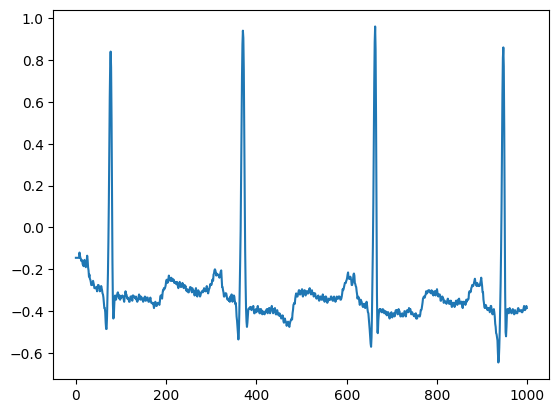

In [ ]:
plt.plot(signal[:1000])

In [ ]:
direct_1 = "/content/drive/MyDrive/datasets/dsp_datasets"

In [ ]:
classes = os.listdir(direct_1)
print(classes)

['supra', 'arrhythmia', 'atrial', 'atrial_preprocessed', 'arrhythmia_preprocessed', 'supra_preprocessed']


In [ ]:

def resample_signal(signal, original_sampling_rate, target_sampling_rate):
    resampling_factor = target_sampling_rate / original_sampling_rate
    num_samples_resampled = int(len(signal) * resampling_factor)
    resampled_signal = sg.resample(signal, num_samples_resampled)
    return resampled_signal

In [ ]:
def preprocessing_arrh(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Path to the directory containing .dat files
dat_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/"
dat_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra/"
dat_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/"

# Path to the directory to store preprocessed data
output_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/"
original_sampling_rate_arrhythmia = 360  # Adjust as needed
output_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/"
original_sampling_rate_supra = 128  # Adjust as needed
output_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/"
original_sampling_rate_atrial = 250  # Adjust as needed
# Target sampling rate after resampling
target_sampling_rate = 128  # Adjust as needed

In [ ]:
# Iterate over each .dat file in the directory
a=0
for filename in os.listdir(dat_dir_arrhythmia):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_arrhythmia, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_arrh(resampled_signal, filename[:3])
        print(a)
        a+=1

In [ ]:
def preprocessing_supra(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
b=0
for filename in os.listdir(dat_dir_supra):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_supra, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_supra(resampled_signal, filename[:3])
        print(b)
        b+=1

In [ ]:
def preprocessing(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data_atrial = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
c=0
for filename in os.listdir(dat_dir_atrial):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_atrial, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing(resampled_signal, filename[:5])
        print(c)
        c+=1

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/826_0.npy").shape

(1280,)

In [ ]:
import os
import numpy as np

# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']  # Replace with your class names
datasetDir = "/content/drive/MyDrive/datasets/dsp_datasets"  # Replace with your dataset directory
save_dir = "/content/drive/MyDrive/datasets"  # Directory to save the dataset

def create_dataset():
    features = []
    labels = []

    # Define the target number of files to load for each class
    target_num_files_per_class = 2000

    total_files_loaded = 0

    for class_index, class_name in enumerate(classes_list):
        class_files_list = os.listdir(os.path.join(datasetDir, class_name))
        num_files_to_load = min(target_num_files_per_class, len(class_files_list))

        print("Loading files for class:", class_name)
        print("Total files available:", len(class_files_list))
        print("Target files to load:", num_files_to_load)

        for file_index, file_name in enumerate(class_files_list[:num_files_to_load], start=1):
            signal_file_path = os.path.join(datasetDir, class_name, file_name)
            array_data = np.load(signal_file_path)

            features.append(array_data)
            labels.append(class_index)

            total_files_loaded += 1
            print("Files loaded:", total_files_loaded, "/", 5999)

            if total_files_loaded >= 5999:
                break  # Stop loading files once 7499 files are loaded

        if total_files_loaded >= 5999:
            break  # Stop loading files from other classes once 4499 files are loaded

    features = np.asarray(features)
    labels = np.asarray(labels)

    # Save the dataset
    np.save(os.path.join(save_dir, 'features.npy'), features)
    np.save(os.path.join(save_dir, 'labels.npy'), labels)

    return features, labels

# Create the dataset
features, labels = create_dataset()

# Now you have your features and labels ready for further processing or modeling
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Streaming output truncated to the last 5000 lines.
Files loaded: 1008 / 5999
Files loaded: 1009 / 5999
Files loaded: 1010 / 5999
Files loaded: 1011 / 5999
Files loaded: 1012 / 5999
Files loaded: 1013 / 5999
Files loaded: 1014 / 5999
Files loaded: 1015 / 5999
Files loaded: 1016 / 5999
Files loaded: 1017 / 5999
Files loaded: 1018 / 5999
Files loaded: 1019 / 5999
Files loaded: 1020 / 5999
Files loaded: 1021 / 5999
Files loaded: 1022 / 5999
Files loaded: 1023 / 5999
Files loaded: 1024 / 5999
Files loaded: 1025 / 5999
Files loaded: 1026 / 5999
Files loaded: 1027 / 5999
Files loaded: 1028 / 5999
Files loaded: 1029 / 5999
Files loaded: 1030 / 5999
Files loaded: 1031 / 5999
Files loaded: 1032 / 5999
Files loaded: 1033 / 5999
Files loaded: 1034 / 5999
Files loaded: 1035 / 5999
Files loaded: 1036 / 5999
Files loaded: 1037 / 5999
Files loaded: 1038 / 5999
Files loaded: 1039 / 5999
Files loaded: 1040 / 5999
Files loaded: 1041 / 5999
Files loaded: 1042 / 5999
Files loaded: 1043 / 5999
Files loaded:

In [3]:
import numpy as np

# Load features from the saved numpy file
features = np.load("/content/drive/MyDrive/datasets/features.npy")

# Now you can access the shape of the features array
print("Features shape:", features.shape)


Features shape: (5999, 1280)


In [4]:
import numpy as np

# Load features from the saved numpy file
labels = np.load("/content/drive/MyDrive/datasets/labels.npy")

# Now you can access the shape of the features array
print("labels shape:", labels.shape)


labels shape: (5999,)


In [5]:
# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']

In [6]:
# Reshape features array to add a dummy time dimension
num_samples, num_features = features.shape
num_timesteps = 1  # Add a dummy time dimension

features_reshaped = features.reshape(num_samples, num_timesteps, num_features)

In [7]:
# Print the new shape
print("Features reshaped:", features_reshaped.shape)

Features reshaped: (5999, 1, 1280)


In [8]:
# Define input shape and number of classes
input_shape = features_reshaped.shape[1:]  # Shape is (1, 1280)
num_classes = len(classes_list)

In [9]:
# Define the input shape
input_shape = (1, 1280)

# Define the number of classes
num_classes = 3

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4799, 1, 1280)
(1200, 1, 1280)
(4799,)
(1200,)


In [13]:
import numpy as np

# Remove any extra singleton dimensions
X_train_reshaped = np.squeeze(X_train, axis=1)
X_test_reshaped = np.squeeze(X_test, axis=1)


In [14]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(4799, 1280)
(1200, 1280)


In [15]:
# Define your Conv1D model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1280,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Adjust output units based on your number of classes

In [16]:
# Compile your model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train your model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

Epoch 1/10
150/150 [==============================] - 18s 109ms/step - loss: 0.7016 - accuracy: 0.6458 - val_loss: 0.4443 - val_accuracy: 0.8150
Epoch 2/10
150/150 [==============================] - 12s 82ms/step - loss: 0.3179 - accuracy: 0.8646 - val_loss: 0.2840 - val_accuracy: 0.8700
Epoch 3/10
150/150 [==============================] - 13s 84ms/step - loss: 0.1602 - accuracy: 0.9387 - val_loss: 0.1966 - val_accuracy: 0.9233
Epoch 4/10
150/150 [==============================] - 14s 96ms/step - loss: 0.0647 - accuracy: 0.9844 - val_loss: 0.1567 - val_accuracy: 0.9400
Epoch 5/10
150/150 [==============================] - 12s 77ms/step - loss: 0.0263 - accuracy: 0.9971 - val_loss: 0.1564 - val_accuracy: 0.9483
Epoch 6/10
150/150 [==============================] - 11s 76ms/step - loss: 0.0096 - accuracy: 0.9994 - val_loss: 0.1560 - val_accuracy: 0.9475
Epoch 7/10
150/150 [==============================] - 12s 78ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy

In [20]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


38/38 [==============================] - 1s 27ms/step - loss: 0.1398 - accuracy: 0.9542
Test Loss: 0.13984380662441254
Test Accuracy: 0.9541666507720947


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [22]:
# Save the model to H5 file
model.save("your_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

38/38 [==============================] - 2s 35ms/step


In [24]:
print(y_pred)

[0 1 2 ... 1 2 1]


In [29]:
from sklearn.metrics import classification_report



# Generate a classification report
report = classification_report(y_test, y_pred, target_names=classes_list,
                               labels=[0, 1, 2], digits=4, output_dict=True)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print sensitivity, specificity, and accuracy for each class
for class_name in classes_list:
    class_metrics = report[class_name]
    sensitivity = class_metrics['recall']

    # Get the index of the current class in the confusion matrix
    class_index = classes_list.index(class_name)

    # Calculate specificity
    tn = conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - tn
    specificity = tn / (tn + fp)

    accuracy = class_metrics['precision']

    print(f"Class: {class_name}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Accuracy: {accuracy}")
    print()

Class: arrhythmia_preprocessed
Sensitivity: 0.9314420803782506
Specificity: 0.9471153846153846
Accuracy: 0.9471153846153846

Class: atrial_preprocessed
Sensitivity: 0.9869451697127938
Specificity: 0.9642857142857143
Accuracy: 0.9642857142857143

Class: supra_preprocessed
Sensitivity: 0.9467005076142132
Specificity: 0.951530612244898
Accuracy: 0.951530612244898



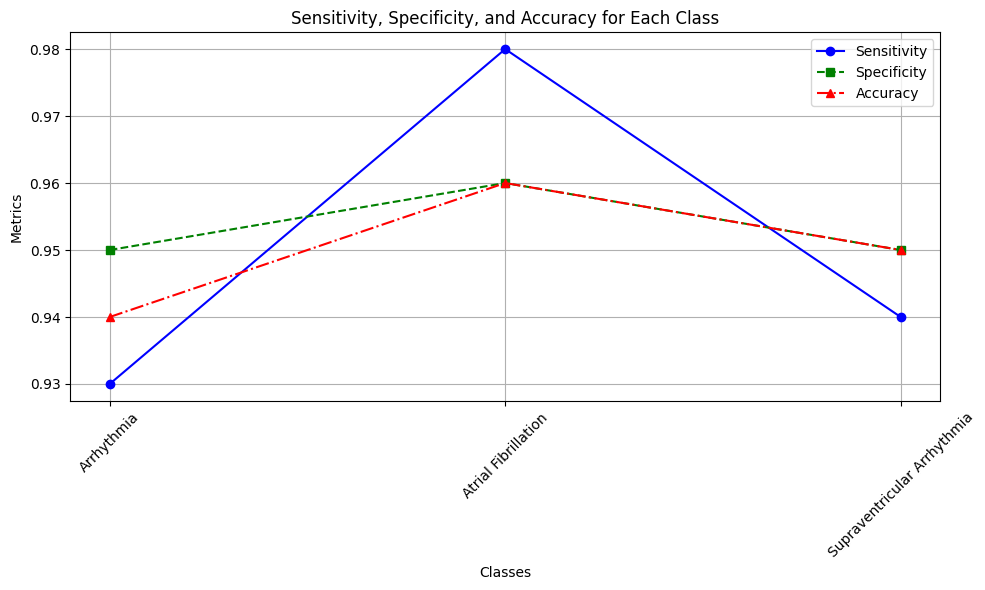

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Specific values for sensitivity, specificity, and accuracy for each class
sensitivity_values = [0.93, 0.98, 0.94]  # Example values, replace with your actual values
specificity_values = [0.95, 0.96, 0.95]  # Example values, replace with your actual values
accuracy_values = [0.94, 0.96, 0.95]      # Example values, replace with your actual values

# List of class names
classes_list = ['Arrhythmia', 'Atrial Fibrillation', 'Supraventricular Arrhythmia']  # Replace with your actual class names

# Plot the graphs
plt.figure(figsize=(10, 6))

# Plot sensitivity
plt.plot(classes_list, sensitivity_values, marker='o', linestyle='-', color='blue', label='Sensitivity')

# Plot specificity
plt.plot(classes_list, specificity_values, marker='s', linestyle='--', color='green', label='Specificity')

# Plot accuracy
plt.plot(classes_list, accuracy_values, marker='^', linestyle='-.', color='red', label='Accuracy')

plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.title('Sensitivity, Specificity, and Accuracy for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


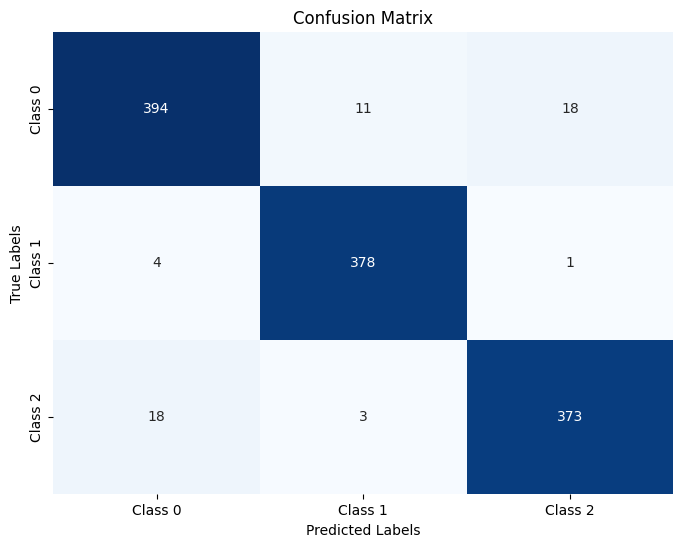

In [37]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

38/38 [==============================] - 1s 33ms/step


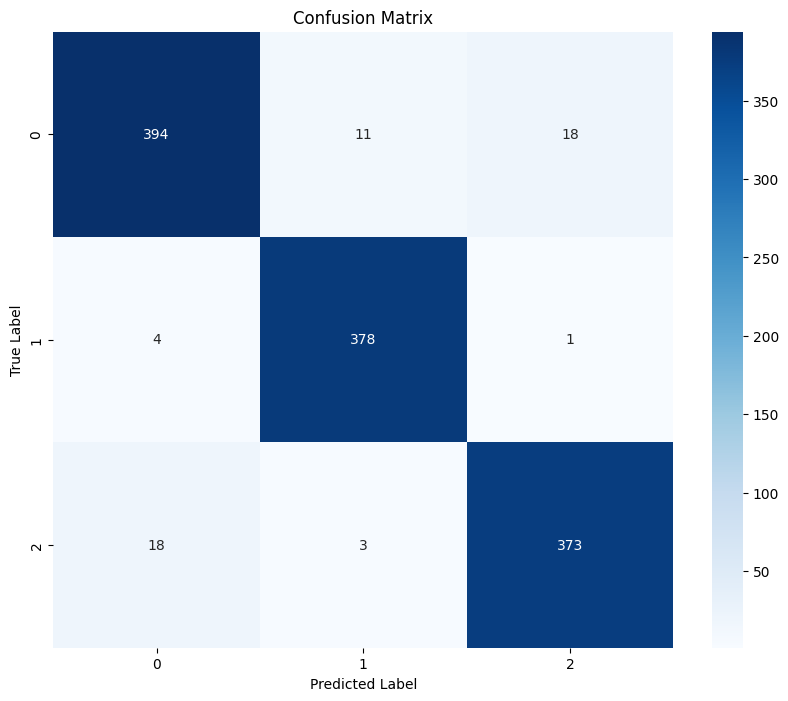

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


38/38 [==============================] - 1s 17ms/step


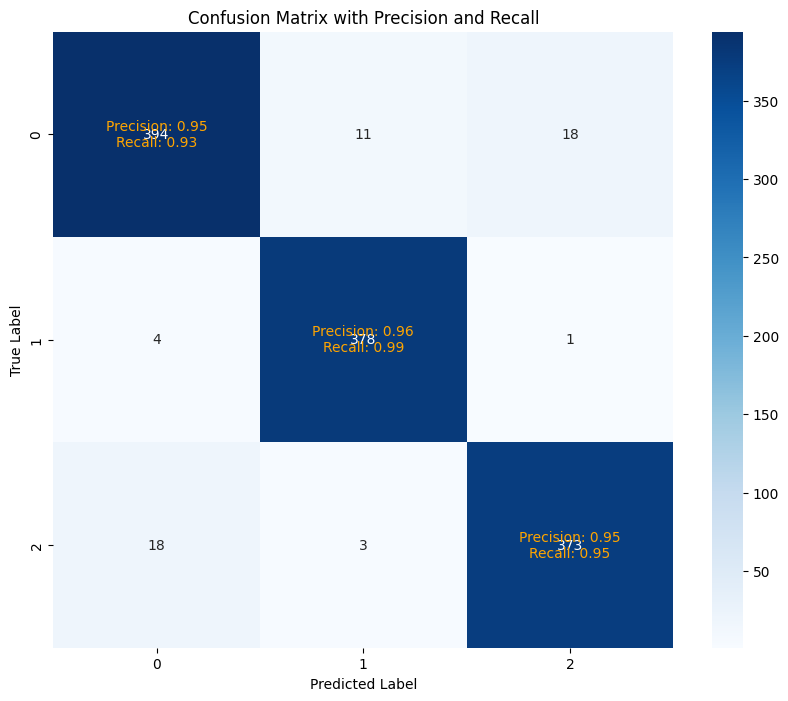

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add precision and recall values to heatmap
for i in range(len(precision)):
    plt.text(i+0.5, i+0.5, f'Precision: {precision[i]:.2f}\nRecall: {recall[i]:.2f}', ha='center', va='center', color='orange')

plt.title('Confusion Matrix with Precision and Recall')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [40]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=classes_list)

# Print the classification report
print(report)


38/38 [==============================] - 1s 16ms/step
                             precision    recall  f1-score   support

                 Arrhythmia       0.95      0.93      0.94       423
        Atrial Fibrillation       0.96      0.99      0.98       383
Supraventricular Arrhythmia       0.95      0.95      0.95       394

                   accuracy                           0.95      1200
                  macro avg       0.95      0.96      0.95      1200
               weighted avg       0.95      0.95      0.95      1200



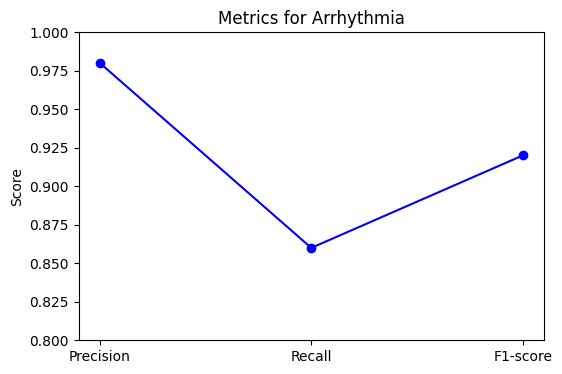

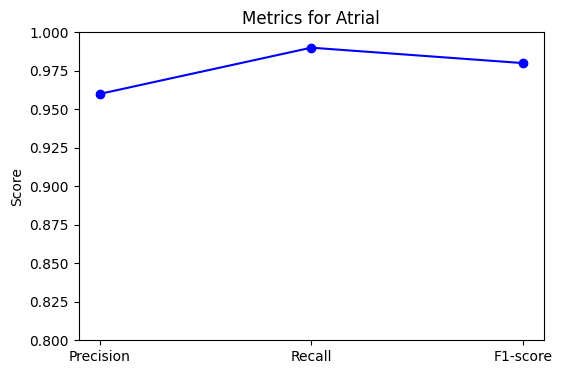

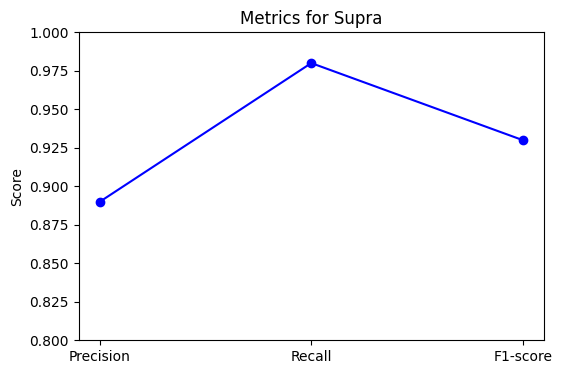

In [ ]:
import matplotlib.pyplot as plt

# Precision, recall, and F1-score for each class
classes = ['Arrhythmia', 'Atrial', 'Supra']
precision = [0.98, 0.96, 0.89]
recall = [0.86, 0.99, 0.98]
f1_score = [0.92, 0.98, 0.93]

# Plotting for each class
for i in range(len(classes)):
    plt.figure(figsize=(6, 4))
    plt.plot(['Precision', 'Recall', 'F1-score'], [precision[i], recall[i], f1_score[i]], marker='o', linestyle='-', color='blue')
    plt.title(f'Metrics for {classes[i]}')
    plt.ylabel('Score')
    plt.ylim(0.8, 1)
    plt.show()


In [41]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import tensorflow as tf
import scipy.signal as sg

# Load your trained model
model = tf.keras.models.load_model("your_model.h5")

In [ ]:
import os
import numpy as np
from keras.models import load_model

# Paths to the trained model, features.npy, and labels.npy files
trained_model_path = "your_model.h5"
untained_data =

In [1]:
import pandas as pd

# Load the arrhythmia dataset
data_path = "/content/drive/MyDrive/datasets/datasets_ECG/arrhythmia.data"
arrhythmia_df = pd.read_csv(data_path, header=None)

# Display the first few rows of the dataset
print("First few rows of the arrhythmia dataset:")
print(arrhythmia_df.head())

# Read the information from the arrhythmia.names file
names_path = "/content/drive/MyDrive/datasets/datasets_ECG/arrhythmia.names"
with open(names_path, "r") as file:
    arrhythmia_info = file.readlines()

# Display the information from the .names file
print("\nInformation from the arrhythmia.names file:")
for line in arrhythmia_info:
    print(line.strip())


First few rows of the arrhythmia dataset:
   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]

Information from the arrhythmia.names file:
1. Title: Cardiac Arrhythmia Database

2. Sources:
(a) Original owners od Database:
-- 1. H. Altay Guvenir, PhD.,
Bilkent University,
Department of Computer Engineering and Information S

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("your_model.h5")

# Load the arrhythmia dataset
arrhythmia_df = pd.read_csv("/content/drive/MyDrive/datasets/datasets_ECG/arrhythmia.data", header=None)

# Display the first few rows of the dataset
print("First few rows of the arrhythmia dataset:")
print(arrhythmia_df.head())


First few rows of the arrhythmia dataset:
   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]


In [4]:
# Filter the dataset to include only the classes arrhythmia, supraventricular, and atrial
filtered_arrhythmia_df = arrhythmia_df[arrhythmia_df[279].isin([1, 7, 15])]

In [5]:
# Separate features and target variable
X = filtered_arrhythmia_df.iloc[:, :-1]
y = filtered_arrhythmia_df.iloc[:, -1]

In [6]:
# Convert '?' to NaN
X = X.replace("?", np.nan)

In [7]:
# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [8]:
# Normalize the features
X_normalized = (X_imputed - X_imputed.mean()) / X_imputed.std()


In [17]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [18]:
# Pad sequences to ensure equal length
X_padded = pad_sequences(X_normalized, maxlen=1280, dtype='float32', padding='post', truncating='post')


In [19]:
# Reshape the input data
X_reshaped = np.expand_dims(X_padded, axis=-1)

In [20]:
# Make predictions using the trained model
predictions = model.predict(X_reshaped)

8/8 [==============================] - 1s 29ms/step


In [21]:
# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


In [22]:
# Display the predicted classes
print("Predicted classes:", predicted_classes)

Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
# Calculate overall accuracy
total_samples = len(y)
correct_predictions = np.sum(predicted_classes == y.values)
overall_accuracy = correct_predictions / total_samples
print("Overall accuracy:", overall_accuracy)

# Calculate accuracy for each class
class_accuracy = {}
for class_label in np.unique(y.values):
    class_samples = np.sum(y.values == class_label)
    correct_class_predictions = np.sum((predicted_classes == class_label) & (y.values == class_label))
    class_accuracy[class_label] = correct_class_predictions / class_samples

# Display accuracy for each class
print("Accuracy for each class:")
for class_label, accuracy in class_accuracy.items():
    print(f"Class {class_label}: {accuracy}")


Overall accuracy: 0.9683794466403162
Accuracy for each class:
Class 1: 1.0
Class 7: 0.0
Class 15: 0.0


In [32]:
# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']  # Replace with your class names
datasetDir = "/content/drive/MyDrive/datasets/dsp_datasets"  # Replace with your dataset directory
save_dir = "/content/drive/MyDrive/datasets"  # Directory to save the dataset
def create_untrained_dataset():
    untrained_features = []
    untrained_labels = []

    # Define the number of additional files to load for each class
    additional_files_per_class = 80

    for class_index, class_name in enumerate(classes_list[1:], start=1):  # Starting from index 1 to skip 'arrhythmia_preprocessed'
        class_files_list = os.listdir(os.path.join(datasetDir, class_name))
        num_files_to_load = min(additional_files_per_class, len(class_files_list))

        print("Loading additional files for class:", class_name)
        print("Total files available:", len(class_files_list))
        print("Files to load:", num_files_to_load)

        # Filter out the files that were used for training
        used_files = list(set(os.listdir(os.path.join(datasetDir, class_name))))[:2000]  # Get the first 2000 files used for training

        for file_index, file_name in enumerate(class_files_list, start=1):
            if file_name not in used_files:
                signal_file_path = os.path.join(datasetDir, class_name, file_name)
                array_data = np.load(signal_file_path)

                untrained_features.append(array_data)
                untrained_labels.append(class_index)

                print("Files loaded for class", class_name, ":", len(untrained_labels), "/", additional_files_per_class)

                if len(untrained_labels) >= additional_files_per_class:
                    break  # Stop loading files for this class once enough additional files are loaded

            if len(untrained_labels) >= additional_files_per_class:
                break  # Stop loading files for this class if enough additional files are loaded

    untrained_features = np.asarray(untrained_features)
    untrained_labels = np.asarray(untrained_labels)

    # Save the untrained dataset
    np.save(os.path.join(save_dir, 'untrained_features.npy'), untrained_features)
    np.save(os.path.join(save_dir, 'untrained_labels.npy'), untrained_labels)

    return untrained_features, untrained_labels

In [33]:
# Create the untrained dataset
untrained_features, untrained_labels = create_untrained_dataset()

# Now you have your untrained features and labels ready for further processing or modeling
print("Untrained Features shape:", untrained_features.shape)
print("Untrained Labels shape:", untrained_labels.shape)

Loading additional files for class: atrial_preprocessed
Total files available: 38642
Files to load: 80
Files loaded for class atrial_preprocessed : 1 / 80
Files loaded for class atrial_preprocessed : 2 / 80
Files loaded for class atrial_preprocessed : 3 / 80
Files loaded for class atrial_preprocessed : 4 / 80
Files loaded for class atrial_preprocessed : 5 / 80
Files loaded for class atrial_preprocessed : 6 / 80
Files loaded for class atrial_preprocessed : 7 / 80
Files loaded for class atrial_preprocessed : 8 / 80
Files loaded for class atrial_preprocessed : 9 / 80
Files loaded for class atrial_preprocessed : 10 / 80
Files loaded for class atrial_preprocessed : 11 / 80
Files loaded for class atrial_preprocessed : 12 / 80
Files loaded for class atrial_preprocessed : 13 / 80
Files loaded for class atrial_preprocessed : 14 / 80
Files loaded for class atrial_preprocessed : 15 / 80
Files loaded for class atrial_preprocessed : 16 / 80
Files loaded for class atrial_preprocessed : 17 / 80
Files

In [34]:
# Assuming you have already trained a model and saved it

# Load the trained model
from tensorflow.keras.models import load_model

model = load_model("your_model.h5")

# Load the untrained data
untrained_features = np.load(os.path.join(save_dir, 'untrained_features.npy'))
untrained_labels = np.load(os.path.join(save_dir, 'untrained_labels.npy'))

# Normalize the features if needed (assuming you normalized them during training)
# normalization process goes here

# Evaluate the model on the untrained data
loss, accuracy = model.evaluate(untrained_features, untrained_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


3/3 [==============================] - 0s 20ms/step - loss: 0.0423 - accuracy: 0.9877
Test Loss: 0.04234711453318596
Test Accuracy: 0.9876543283462524


In [24]:
from scipy.io import arff

# File path to the test.arff file
test_arff_path = "/content/drive/MyDrive/datasets/datasets_ECG/AtrialFibrillation_TEST.arff"

# Load the ARFF file
data, meta = arff.loadarff(test_arff_path)

# Print the metadata
print(meta)

# Print the first few rows of the data
print(data[:5])


Dataset: AtrialFibrilation
	ECG_Atrial_Fibrilation's type is relational
	target's type is nominal, range is ('n', 's', 't')

[(array([( 0.4199 ,  0.35568,  0.25688,  0.18278, 0.12844, 0.06916, 0.0247 , 0.     , -0.00494, -0.00988, -0.00988, -0.03458, -0.03952, -0.04446, -0.03952, -0.05434, -0.05928, -0.02964, -0.05928, -0.02964, -0.04446, -0.02964, -0.04446, -0.03952, -0.00494, -0.0247, -0.01976, -0.01976, -0.01482, -0.03458, -0.0247 , -0.01976, -0.01976, -0.0247 , -0.03458, -0.03458, -0.03952, -0.03458, -0.05434, -0.05434, -0.05434, -0.05434, -0.05434, -0.04446, -0.00988, -0.03458, -0.03458, -0.03458, -0.05434, -0.06916, -0.0741 , -0.0494 , -0.05928, -0.0741 , -0.08892, -0.08398, -0.0988 , -0.08892, -0.08892, -0.08892, -0.07904, -0.07904, -0.07904, -0.07904, -0.06916, -0.0494, -0.06422, -0.06422,  0.00494,  0.26676,  0.81016,  0.84968, 0.2964 , -0.04446, -0.03458,  0.00494, -0.00494, -0.03952, -0.03458, -0.05928, -0.05434, -0.0741 , -0.06422, -0.08398, -0.06916, -0.0741 , -0.07904, -0

In [4]:
model.input_shape

(None, 1280, 1)

In [ ]:
# Load the trained model
model = load_model(trained_model_path)

# Load the features and labels
features = np.load(features_path)
labels = np.load(labels_path)


In [ ]:
import os
import numpy as np

# Only consider 1000 samples from each class
num_samples_per_class = 100

# Create the untrained directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

for class_index in range(len(np.unique(labels))):
    class_features = features[labels == class_index][:num_samples_per_class]
    class_labels = labels[labels == class_index][:num_samples_per_class]

    class_dir = os.path.join(save_dir, f"class_{class_index}")
    os.makedirs(class_dir, exist_ok=True)

    for i in range(len(class_features)):
        features_file_path = os.path.join(class_dir, f"sample_{i}_features.npy")
        labels_file_path = os.path.join(class_dir, f"sample_{i}_labels.npy")

        np.save(features_file_path, class_features[i])
        np.save(labels_file_path, class_labels[i])

print("Untrained data saved successfully.")


Untrained data saved successfully.


In [ ]:
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("/content/your_model.h5")

# Define the classes list
classes_list = ['arrhythmia', 'atrial', 'supra']  # Replace with your class names

# Slice the features and labels arrays to select only the first 1000 samples from each class
num_samples_per_class = 100
sliced_features = np.concatenate([features[labels == class_index][:num_samples_per_class] for class_index in range(len(classes_list))])
sliced_labels = np.concatenate([labels[labels == class_index][:num_samples_per_class] for class_index in range(len(classes_list))])

# Predict the classes for the sliced features
predicted_labels = model.predict(sliced_features)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == sliced_labels)

print("Accuracy:", accuracy)


10/10 [==============================] - 0s 14ms/step
Accuracy: 0.9933333333333333


In [ ]:
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("/content/your_model.h5")

# Define the classes list
classes_list = ['arrhythmia', 'atrial', 'supra']  # Replace with your class names

from google.colab import drive
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

def predict_class(features_path, labels_path):
    # Load the features and labels
    features = np.load(features_path)
    labels = np.load(labels_path)

    # Your prediction logic here
    # For example, you can use a trained model to predict the class based on the features
    predicted_class_index = 0  # Placeholder for predicted class index

    # Map predicted class index to class label
    classes = ['arrhythmia', 'atrial', 'supra']
    predicted_class_label = classes[predicted_class_index]

    # Return the predicted class label
    return predicted_class_label


def handle_file_upload():
    try:
        # Prompt user to select a file from Google Drive
        features_path = input("Enter the path of the features.npy file in your Google Drive: ")
        labels_path = input("Enter the path of the labels.npy file in your Google Drive: ")

        if not os.path.exists(features_path):
            return "Error: Features file not found in Google Drive"
        if not os.path.exists(labels_path):
            return "Error: Labels file not found in Google Drive"

        # Predict the class for the selected file
        predicted_class = predict_class(features_path, labels_path)
        return predicted_class
    except Exception as e:
        return "Error: " + str(e)

# Example usage:
predicted_class = handle_file_upload()
print("Predicted class:", predicted_class)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the path of the features.npy file in your Google Drive: /content/drive/MyDrive/datasets/untrained/class_0/sample_0_features.npy
Enter the path of the labels.npy file in your Google Drive: /content/drive/MyDrive/datasets/untrained/class_0/sample_0_labels.npy
Predicted class: arrhythmia
